In [2]:
import matplotlib.pyplot as plt
import timeit
import sys

module_path = '../src/'

sys.path.append(module_path)
from implement_TeVSGT import *

Compiling TeVSGT...

Done! 


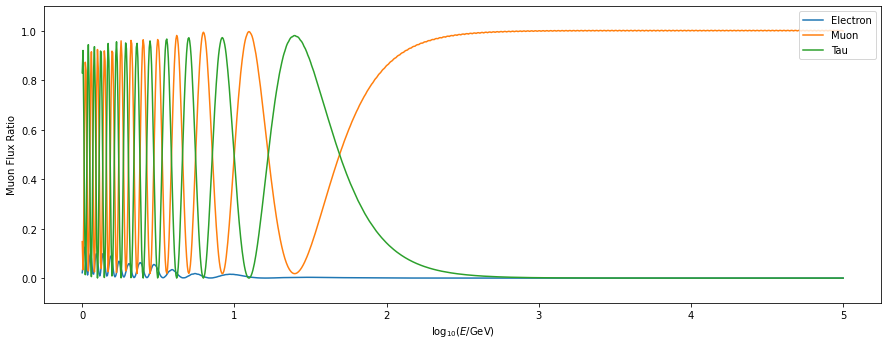

Time:  6.122259473995655


In [3]:
start = timeit.default_timer()

model_type = "SM"
params_ranges = []
neutrino_type = "antineutrino" 
L = 12742 # km
E_min = 1 # GeV
E_max = 1e5 # GeV
E_range = [E_min, E_max]
medium = "earth"
initial_flux_ratios = [0, 1, 0]
NormalOrdering = True

data = implement_model(model_type, params_ranges, E_range, [medium, [-1, 0, 2]], initial_flux_ratios, neutrino_type, NormalOrdering, Nen=1000)

energy = data[0, :, 0] # in GeV
log_energy = np.log10(energy)

# Plot settings
plt.figure(figsize=(15, 12))

plt.subplot(2, 1, 2)  
plt.ylim(-0.1, 1.1)
plt.xlabel(r'$\log_{10}(E/\mathrm{GeV})$')
plt.ylabel('Muon Flux Ratio')
plt.plot(log_energy, data[0, :, 1], label='Electron')
plt.plot(log_energy, data[0, :, 2], label='Muon')
plt.plot(log_energy, data[0, :, 3], label='Tau')
plt.legend(loc='upper right')



plt.show()

stop = timeit.default_timer()

print('Time: ', stop - start)

Compiling TeVSGT...

Done! 


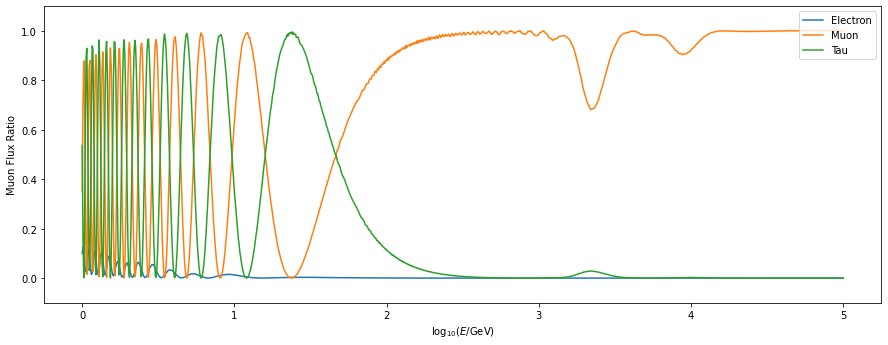

Time:  35.303734000000986


In [51]:
start = timeit.default_timer()

model_type = "ADD"
params_ranges = [[0.2, 0.2, 1], [0, 0.0, 1]]
neutrino_type = "antineutrino" 
L = 12742 # km
E_min = 1 # GeV
E_max = 1e5 # GeV
E_range = [E_min, E_max]
medium = "earth"
initial_flux_ratios = [0, 1, 0]
NormalOrdering = True

data = implement_model(model_type, params_ranges, E_range, [medium, [-1, 0, 2]], initial_flux_ratios, neutrino_type, NormalOrdering, Nen=1000)

energy = data[0, 0, 0, :, 0] # in GeV
log_energy = np.log10(energy)

# Plot settings
plt.figure(figsize=(15, 12))

plt.subplot(2, 1, 2)  
plt.ylim(-0.1, 1.1)
plt.xlabel(r'$\log_{10}(E/\mathrm{GeV})$')
plt.ylabel('Muon Flux Ratio')
plt.plot(log_energy, data[0, 0, 0, :, 1], label='Electron')
plt.plot(log_energy, data[0, 0, 0, :, 2], label='Muon')
plt.plot(log_energy, data[0, 0, 0, :, 3], label='Tau')
plt.legend(loc='upper right')



plt.show()

stop = timeit.default_timer()

print('Time: ', stop - start)

Compiling TeVSGT...

Done! 


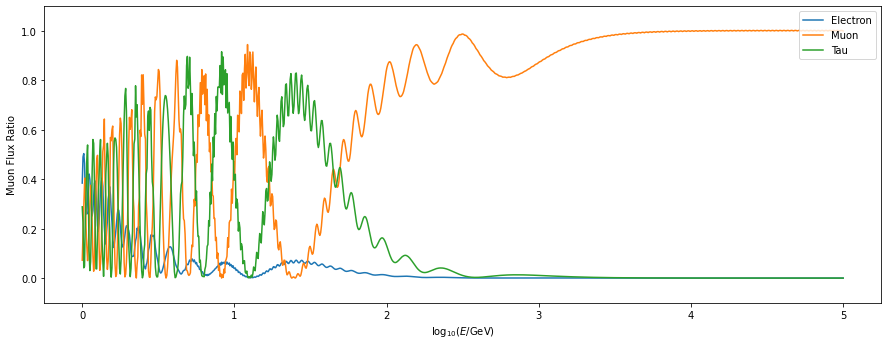

Time:  2.3455020310011605


In [4]:
start = timeit.default_timer()

model_type = "SM_Copies"
params_ranges = [[10, 10, 1], [5, 5, 1], [0, 0, 1]]
neutrino_type = "antineutrino" 
L = 12742 # km
E_min = 1 # GeV
E_max = 1e5 # GeV
E_range = [E_min, E_max]
medium = "vacuum"
initial_flux_ratios = [0, 1, 0]
NormalOrdering = True

data = implement_model(model_type, params_ranges, E_range, [medium, [L, L, 1]], initial_flux_ratios, neutrino_type, NormalOrdering, Nen=1000)

energy = data[0, 0, 0, 0, :, 0] # in GeV
log_energy = np.log10(energy)

# Plot settings
plt.figure(figsize=(15, 12))

plt.subplot(2, 1, 2)  
plt.ylim(-0.1, 1.1)
plt.xlabel(r'$\log_{10}(E/\mathrm{GeV})$')
plt.ylabel('Muon Flux Ratio')
plt.plot(log_energy, data[0, 0, 0, 0, :, 1], label='Electron')
plt.plot(log_energy, data[0, 0, 0, 0, :, 2], label='Muon')
plt.plot(log_energy, data[0, 0, 0, 0, :, 3], label='Tau')
plt.legend(loc='upper right')



plt.show()

stop = timeit.default_timer()

print('Time: ', stop - start)

Compiling TeVSGT...

Done! 


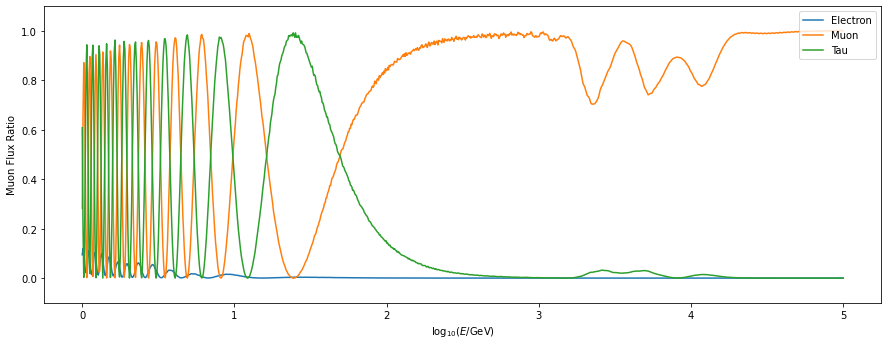

Time:  106.75379644900386


In [22]:
start = timeit.default_timer()

model_type = "darkdim"
params_ranges = [[0.2, 0.2, 1], [0, 0, 1], [4.24, 4.24, 1], [1.19, 1.19, 1], [-0.037, -0.037, 1]]
neutrino_type = "antineutrino" 
L = 12742 # km
E_min = 1 # GeV
E_max = 1e5 # GeV
E_range = [E_min, E_max]
medium = "earth"
initial_flux_ratios = [0, 1, 0]
NormalOrdering = True

data = implement_model(model_type, params_ranges, E_range, [medium, [-1, -1, 1]], initial_flux_ratios, neutrino_type, NormalOrdering, Nen=1000)

energy = data[0, 0, 0, 0, 0, 0, :, 0] # in GeV
log_energy = np.log10(energy)

# Plot settings
plt.figure(figsize=(15, 12))

plt.subplot(2, 1, 2)  
plt.ylim(-0.1, 1.1)
plt.xlabel(r'$\log_{10}(E/\mathrm{GeV})$')
plt.ylabel('Muon Flux Ratio')
plt.plot(log_energy, data[0, 0, 0, 0, 0, 0, :, 1], label='Electron')
plt.plot(log_energy, data[0, 0, 0, 0, 0, 0, :, 2], label='Muon')
plt.plot(log_energy, data[0, 0, 0, 0, 0, 0, :, 3], label='Tau')
plt.legend(loc='upper right')



plt.show()

stop = timeit.default_timer()

print('Time: ', stop - start)

make: Nothing to be done for 'examples_AZ'.

Done! 
Time:  1571.3366963650042


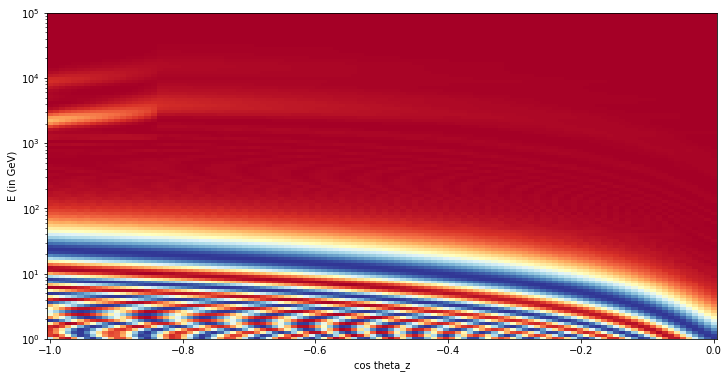

In [420]:
start = timeit.default_timer()

model_type = "ADD"
params_ranges = [[0.2, 0.2, 1], [0, 0, 1]]
neutrino_type = "antineutrino" 
L = 12742 # km
E_min = 1 # GeV
E_max = 1e5 # GeV
E_range = [E_min, E_max]
medium = "earth"
initial_flux_ratios = [0, 1, 0]
NormalOrdering = True

n_mesh = 110
data = implement_model(model_type, params_ranges, E_range, [medium, [-1, 0, n_mesh]], initial_flux_ratios, neutrino_type, NormalOrdering, Nen=n_mesh)

energy = data[0, 0, 0, :, 0] # in GeV
cos = np.linspace(-1, 0, n_mesh)

flux_ratio_grid = data[:, 0, 0, :, 2].T

cosX, EY = np.meshgrid(cos, energy)

fig, ax = plt.subplots(1, 1, figsize=(12,6))


ax.set_yscale('log')
ax.set_xlabel("cos theta_z")
ax.set_ylabel("E (in GeV)")
ax.set_ylim([E_min, E_max])


plt.pcolormesh(cosX, EY, flux_ratio_grid, cmap = "RdYlBu_r", vmin=0, vmax=1)

#fig.savefig('AZ_ADD_Earth_angle.jpg',bbox_inches='tight', dpi=150)

stop = timeit.default_timer()

print('Time: ', stop - start)

Compiling TeVSGT...

Done! 


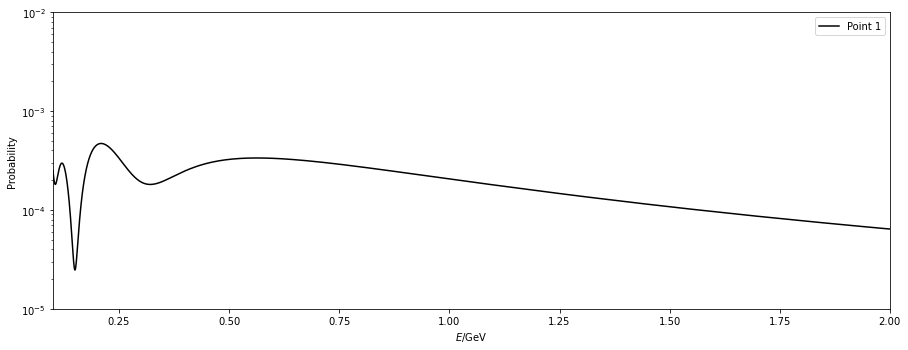

Time:  2.6504715839982964


In [19]:
start = timeit.default_timer()

model_type = "darkdim"
neutrino_type = "neutrino" 
L = 0.5 # km
E_min = 0.1 # GeV
E_max = 2 # GeV
E_range = [E_min, E_max]
medium = "vacuum"
initial_flux_ratios = [0, 1, 0]
NormalOrdering = True

params_ranges1 = [[0.38, 0.38, 1], [0, 0, 1], [4.24, 4.24, 1], [1.19, 1.19, 1], [-0.037, -0.037, 1]]
data1 = implement_model(model_type, params_ranges1, E_range, [medium, [L, L, 1]], initial_flux_ratios, neutrino_type, NormalOrdering, Nen=1000)
"""
params_ranges2 = [[1.28, 1.28, 1], [0, 0, 1], [-1.1, -1.1, 1], [-1.2,-1.2, 1], [3.2, 3.2, 1]]
data2 = implement_model(model_type, params_ranges2, E_range, [medium, [L, L, 1]], initial_flux_ratios, neutrino_type, NormalOrdering, Nen=1000)

params_ranges3 = [[0.36, 0.36, 1], [0, 0, 1], [0.43, 0.43, 1], [1., 1., 1], [0.41, 0.41, 1]]
data3 = implement_model(model_type, params_ranges3, E_range, [medium, [L, L, 1]], initial_flux_ratios, neutrino_type, NormalOrdering, Nen=1000)
"""
energy = data1[0, 0, 0, 0, 0, 0, :, 0] # in GeV

# Plot settings
plt.figure(figsize=(15, 12))

plt.subplot(2, 1, 2)  
plt.xlim([0.1, 2])
plt.ylim([1e-5, 1e-2])
plt.yscale('log')
plt.xlabel(r'$E/\mathrm{GeV}$')
plt.ylabel('Probability')
plt.plot(energy, data1[0, 0, 0, 0, 0, 0, :, 1], label='Point 1', color="k")
#plt.plot(energy, data2[0, 0, 0, 0, 0, 0, :, 1], label='Point 2', color="g")
#plt.plot(energy, data3[0, 0, 0, 0, 0, 0, :, 1], label='Point 3', color="pink")
plt.legend(loc='upper right')



plt.show()

stop = timeit.default_timer()

print('Time: ', stop - start)